In [0]:
#SuperVised Learning
  #1. Classification
  #2. Regression
import pandas as pd
iris = pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [0]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [0]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [0]:
#Encoding of labels
Y = iris['Species'].map({'Iris-setosa':0, 
                      'Iris-versicolor':1, 
                      'Iris-virginica':2 })

In [0]:
#Features or X or independent variables
X = iris.drop(['Id','Species'],axis=1)    #axis=1 as we are selecting columns
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [0]:
#Train your model
from sklearn.neighbors import KNeighborsClassifier
kmodel = KNeighborsClassifier(n_neighbors=3)

In [0]:
#Validate your model
#what is the accuracy of your model ?
#Training data set
#Validation data set/ testing data set
#xtrain-120 , xtest-30
#ytrain-120 , ytest-30
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.50)

In [0]:
kmodel.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
ypred = kmodel.predict(xtest)
ypred

array([0, 2, 2, 2, 0, 1, 0, 0, 2, 1, 1, 0, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2,
       0, 2, 0, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2,
       1, 1, 1, 0, 1, 0, 2, 2, 0, 1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 0, 2, 2,
       2, 2, 0, 2, 2, 1, 1, 0, 1])

In [0]:
(ytest == ypred).sum()/len(xtest)

0.92

In [0]:
kmodel.score(xtest,ytest)

0.92

In [0]:
#Predict the output
#.predict()
kmodel.predict([[3.2,2.1,8.9,6.8],[2.1,3.2,3.3,2.1]])

array([2, 1])

In [0]:
#How to decide the value of k
# How to tune a a parameter in training
print('hello')

hello


In [0]:
len(xtrain)

75

In [0]:
#Parameter tuning , k
#only be decided by error monitoring
accuracy = []
for i in range(1,10):
  km = KNeighborsClassifier(n_neighbors=i)
  km.fit(xtrain,ytrain)
  s = km.score(xtest,ytest)
  accuracy.append(s)

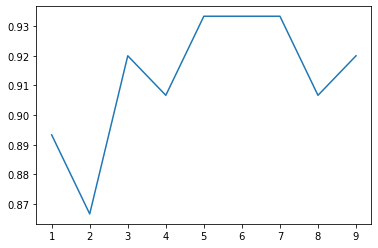

In [0]:
accuracy
import numpy as np
a=np.arange(1,10)
b=accuracy
import matplotlib.pyplot as plt
plt.plot(a,b)
plt.show()

In [0]:
#High Accuracy
#4 - Features - sl,sw,pl,pw
#any 2 feature
x1 = X['SepalLengthCm']
x2 = X['SepalWidthCm']
x3 = X['PetalLengthCm']
x4 = X['PetalWidthCm']

In [0]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

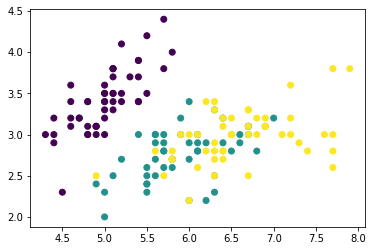

In [0]:
plt.scatter(x1,x2,c=Y)
plt.show()

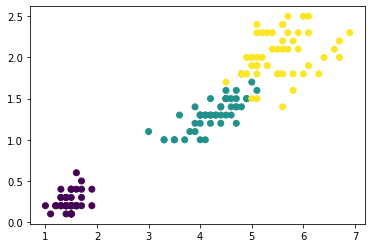

In [0]:
plt.scatter(x3,x4,c=Y)
plt.show()

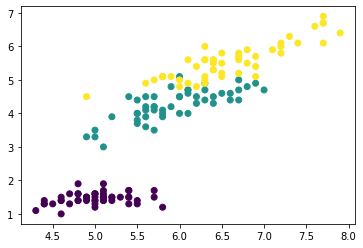

In [0]:
plt.scatter(x1,x3,c=Y)
plt.show()

In [0]:
X['label'] = Y

In [0]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [0]:
X.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
label,0.782561,-0.419446,0.949043,0.956464,1.000000


In [0]:
kmodel.predict([[3.2,1.2,0.9,8.9],
                [3.2,1.2,0.9,0.9]])

array([1, 0])

In [0]:
name = np.array([['setosa'],
                 ['versicolor'],
                 ['virginica']])

In [0]:
name[kmodel.predict([[3.2,1.2,0.9,8.9],[3.2,1.2,0.9,0.9]])]

array([['versicolor'],
       ['setosa']], dtype='<U10')